Jupyter Notebook til kursus "Laboratory Methods in the Geosciences"

Bada Bing Bada Bum 

Revideret script

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Dybde                                72 non-null     object 
 1   Lokation                             72 non-null     object 
 2   Prøve                                72 non-null     object 
 3   Volumenvægt (g/cm³)                  69 non-null     float64
 4   Porøsitet (%)                        69 non-null     float64
 5   Volumetrisk Vandindhold (%)          69 non-null     float64
 6   Gravimetrisk vandindhold (%)         24 non-null     float64
 7   Indhold af organisk kulstof (%)      24 non-null     float64
 8   Indhold af kulstof (%)               24 non-null     float64
 9   pH H2O                               21 non-null     float64
 10  pH CaCl2                             21 non-null     float64
 11  Reaktionstal                      

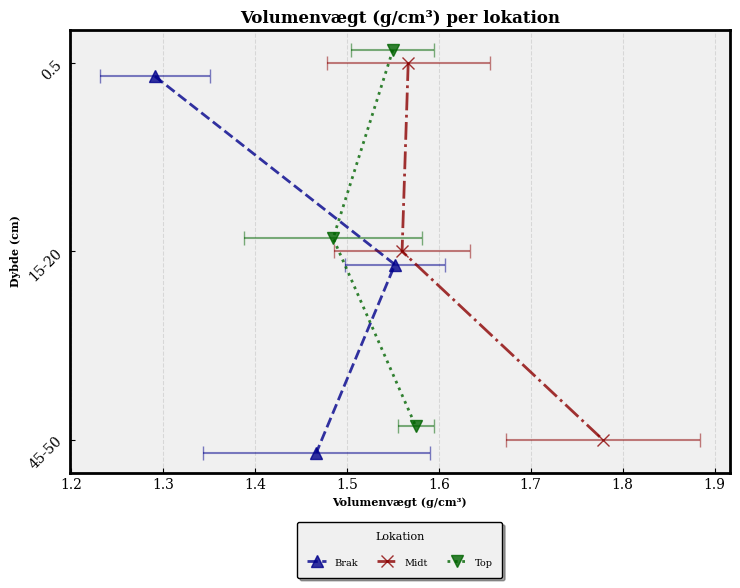

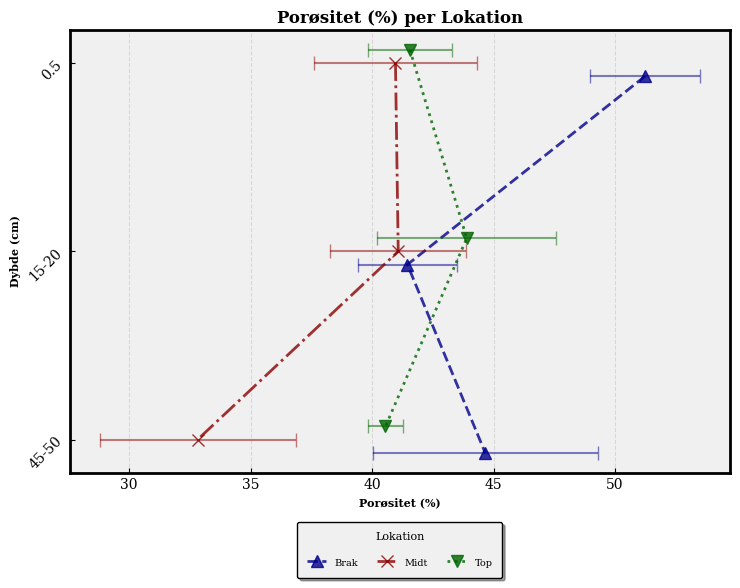

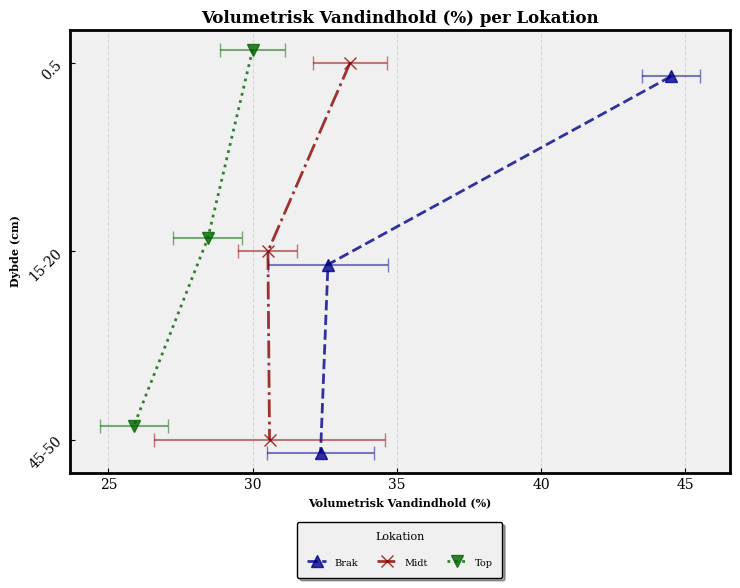

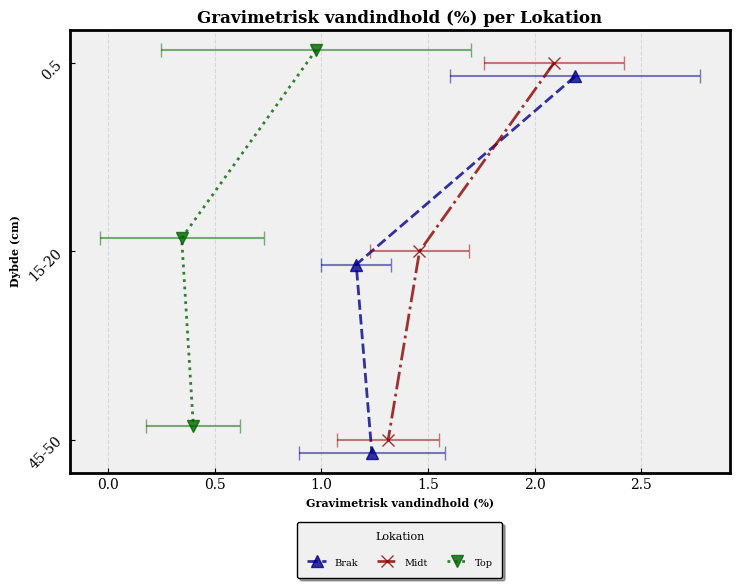

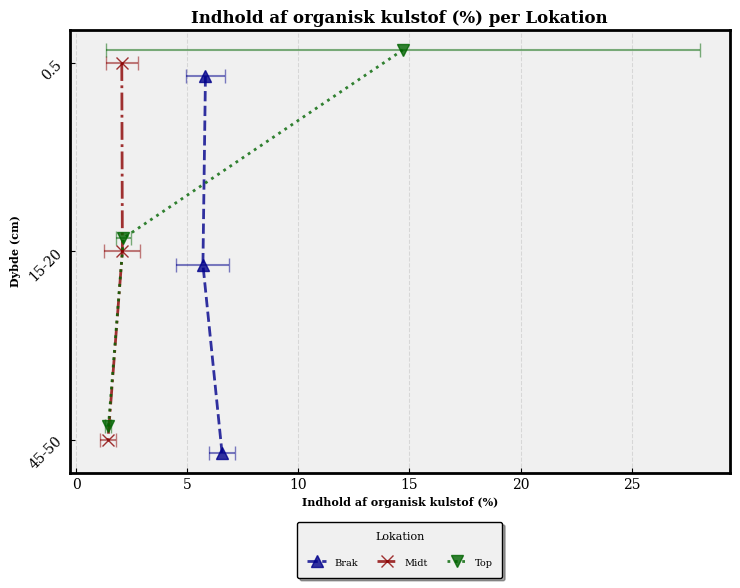

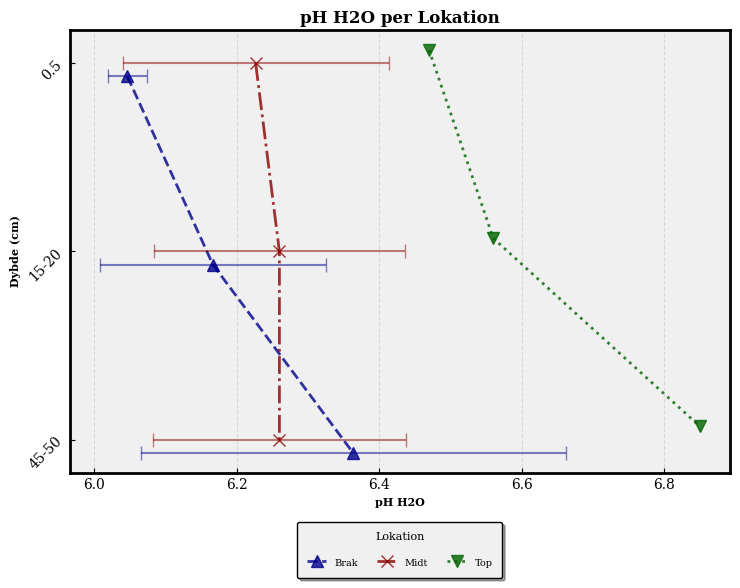

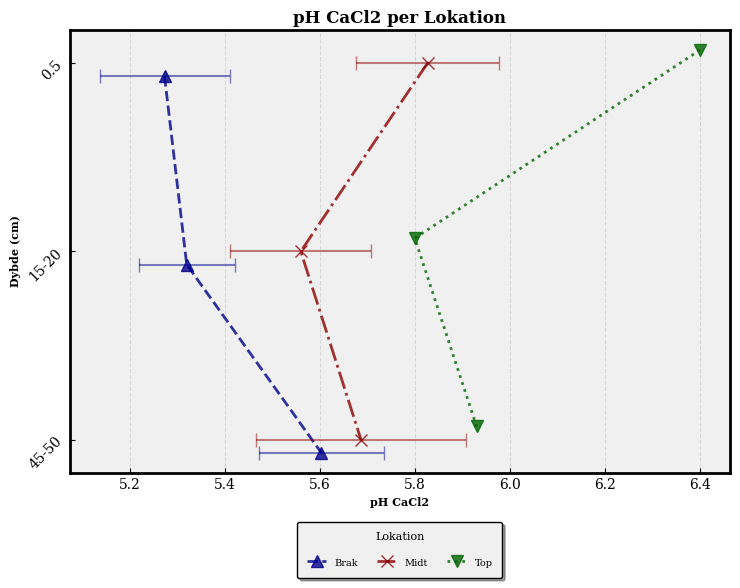

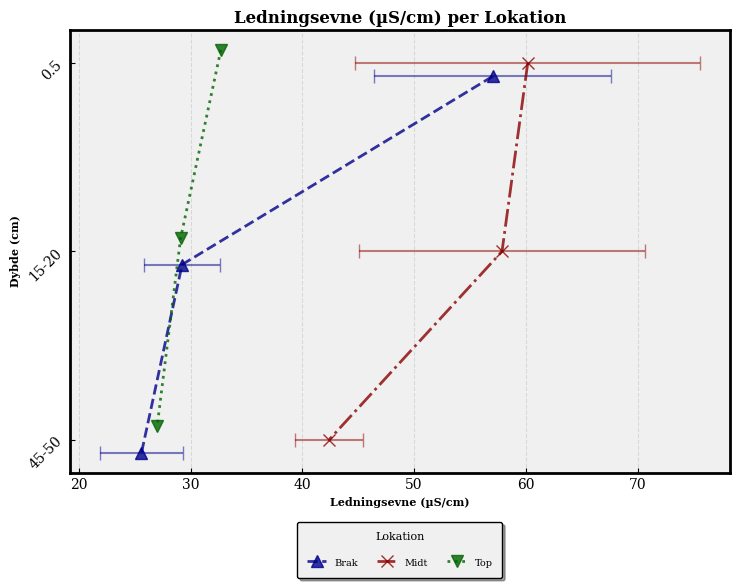

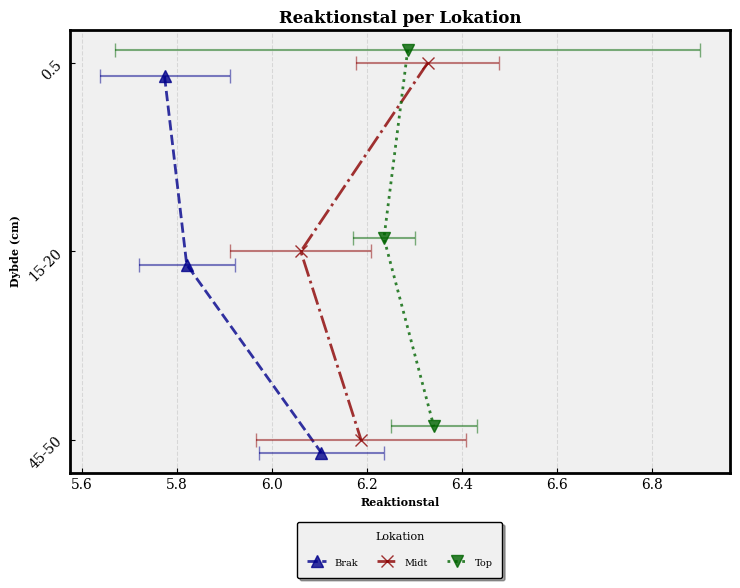

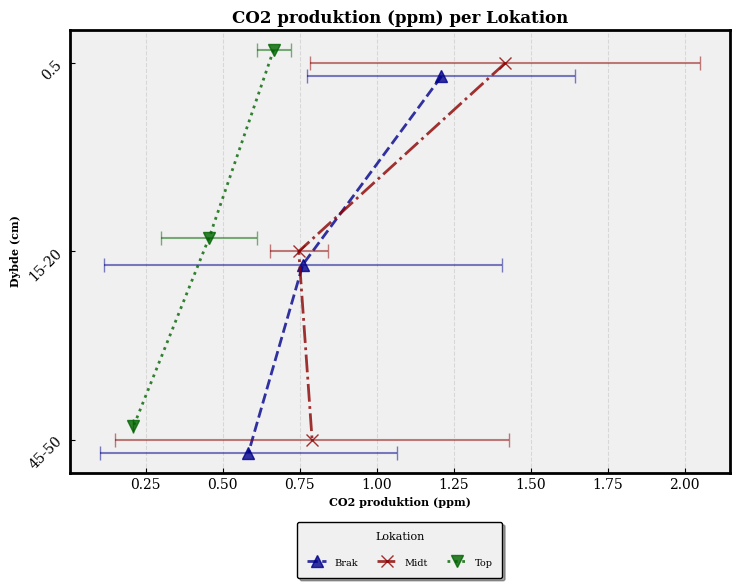

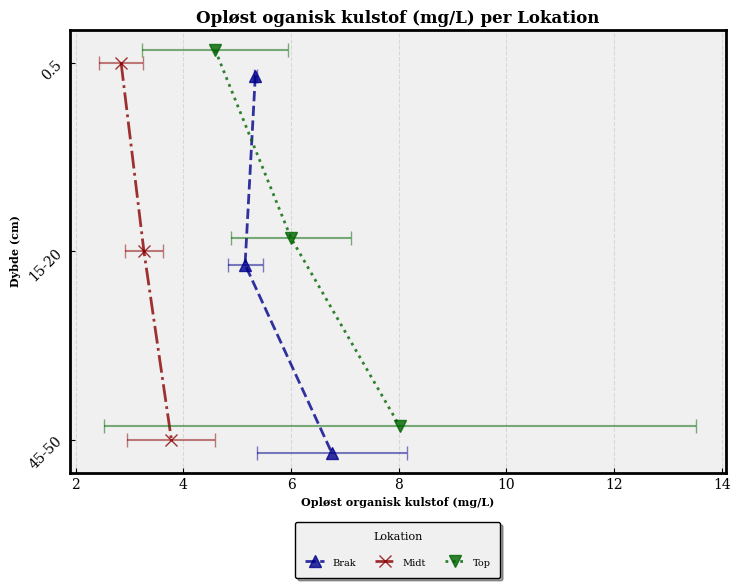

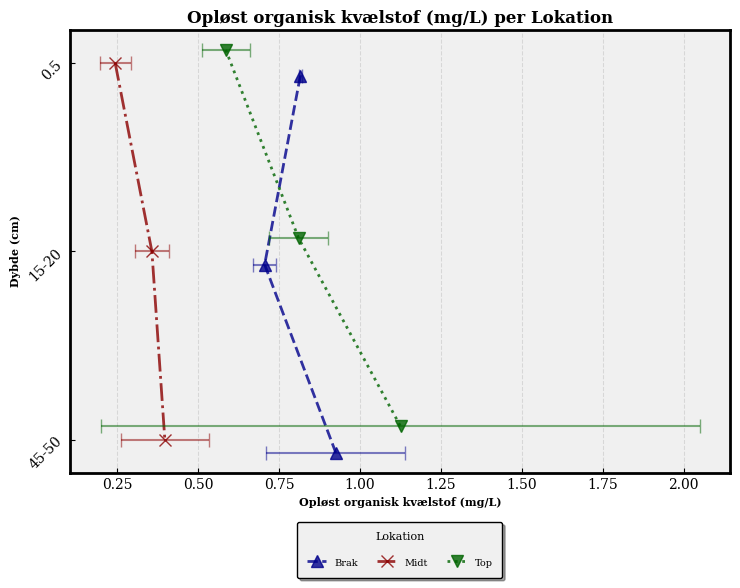

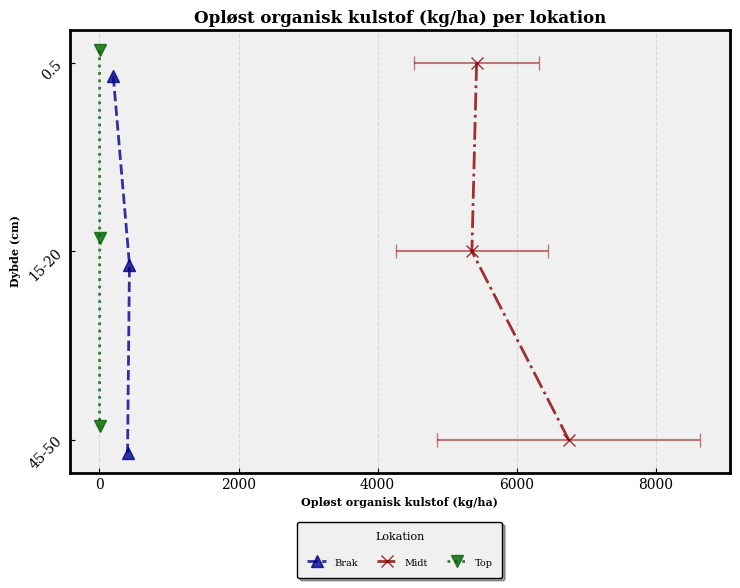

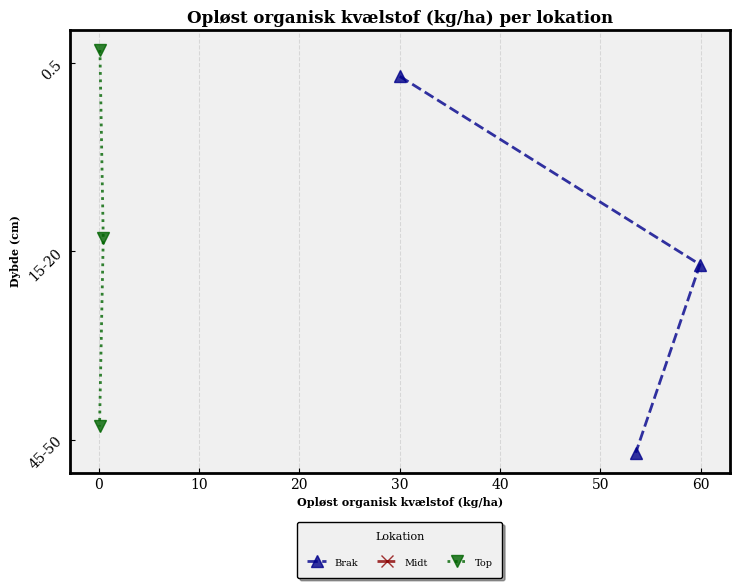

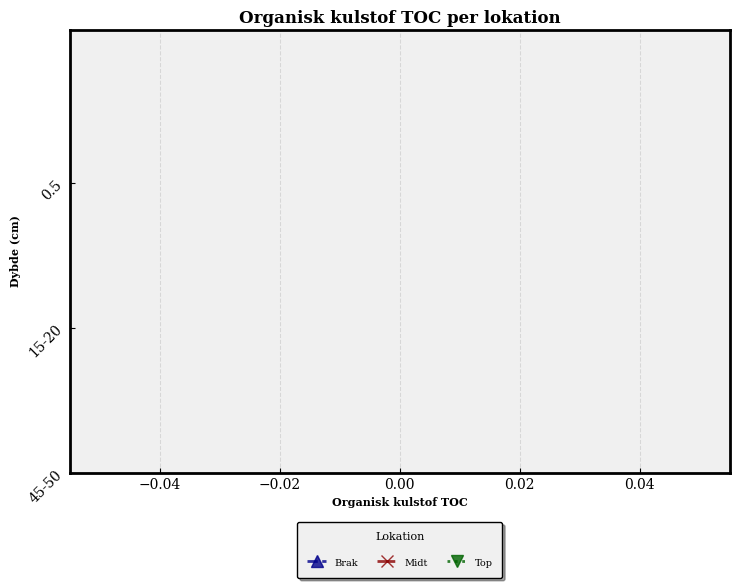

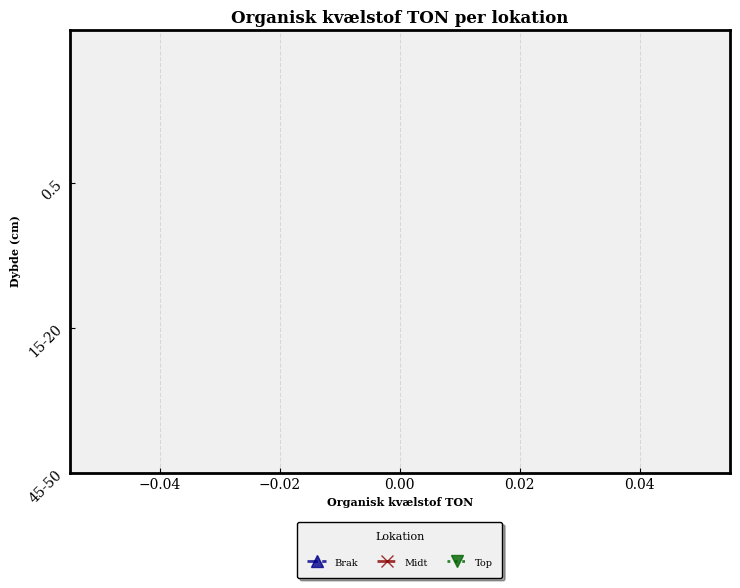

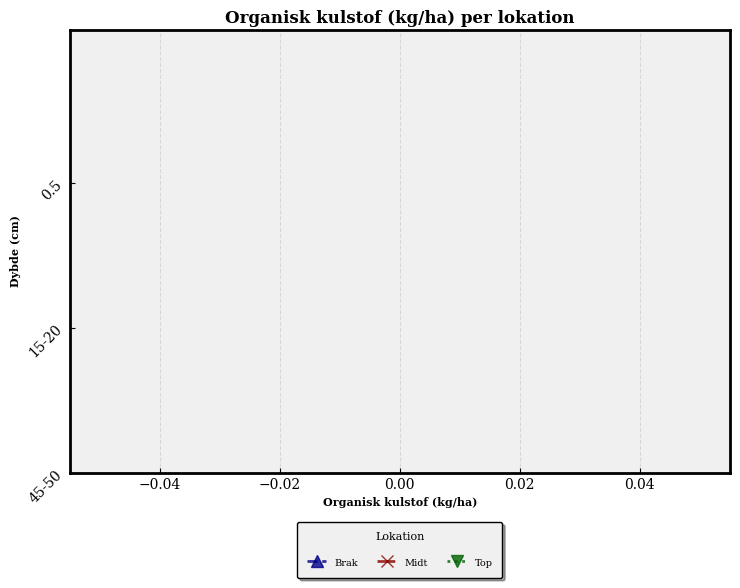

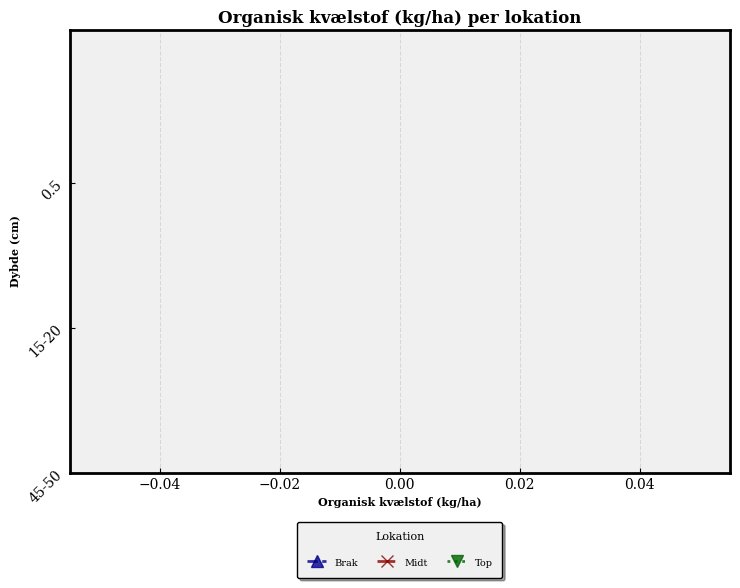

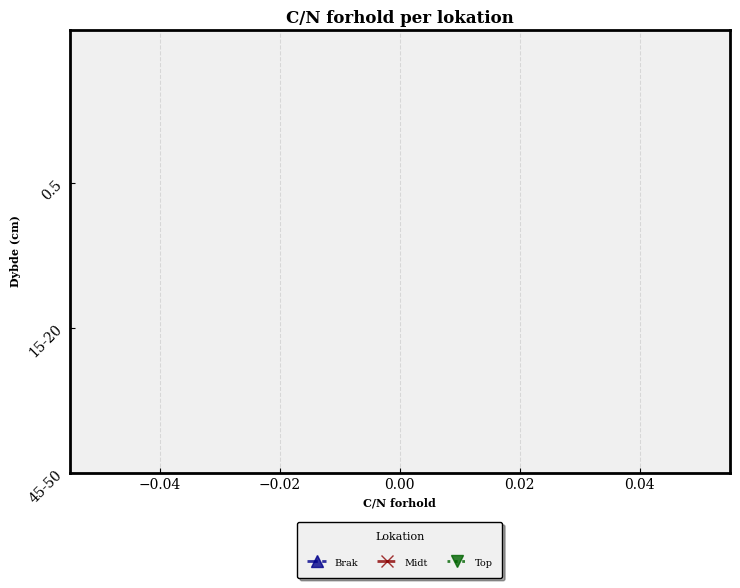

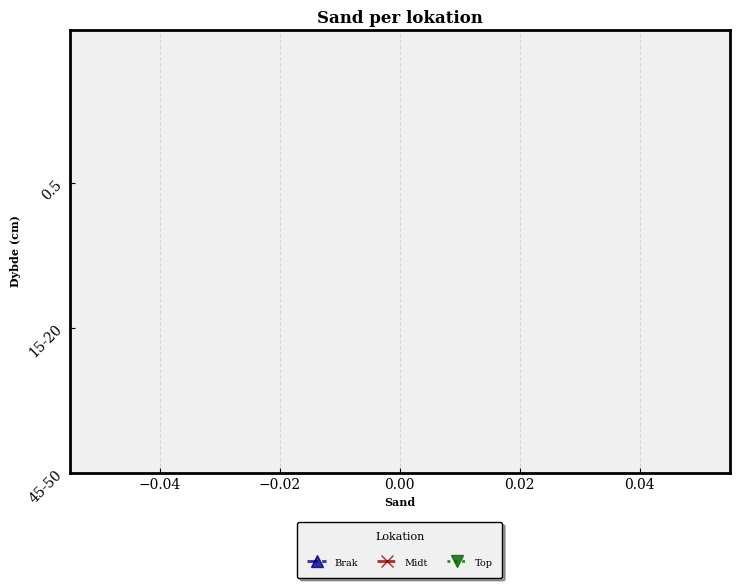

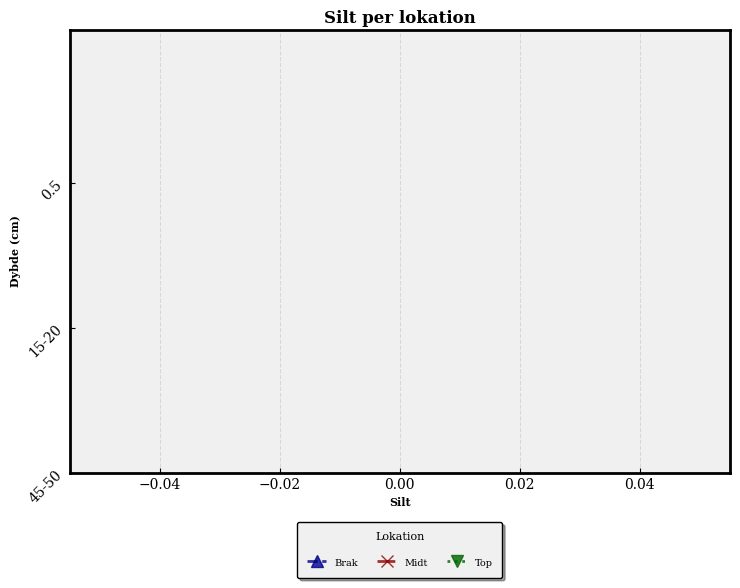

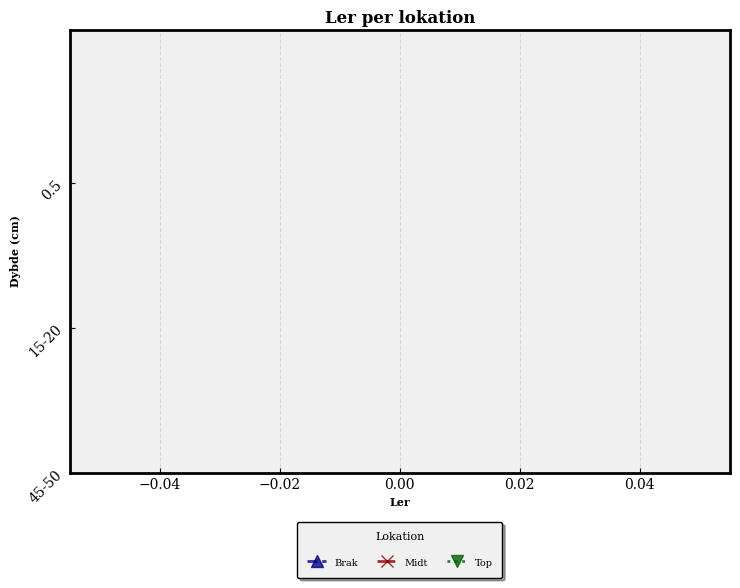

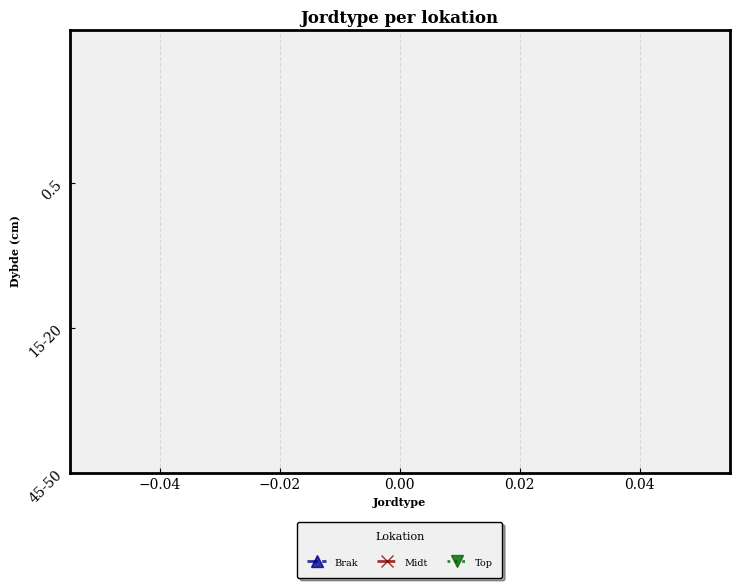

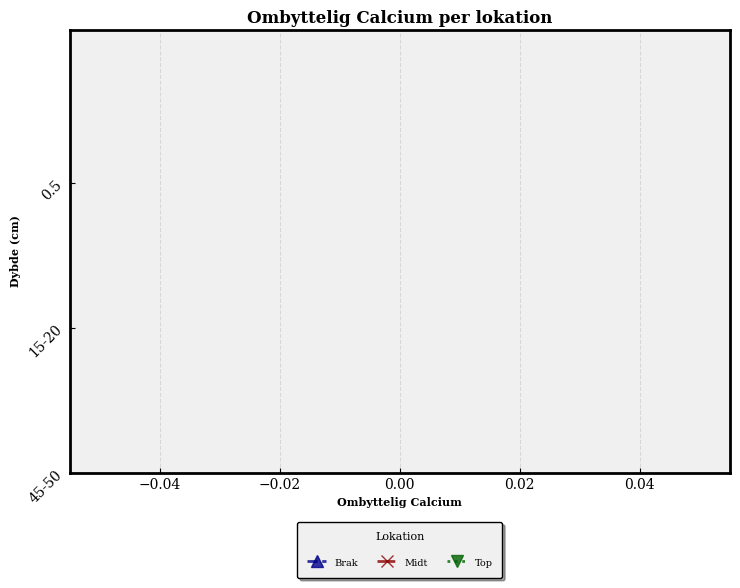

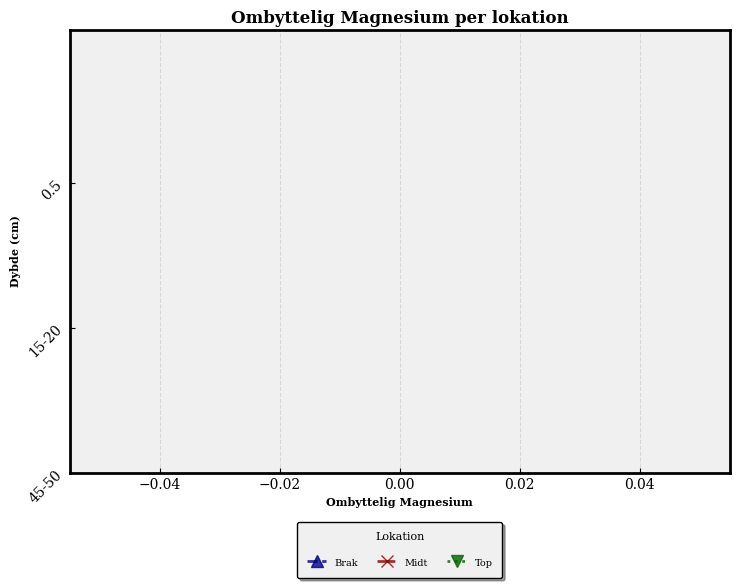

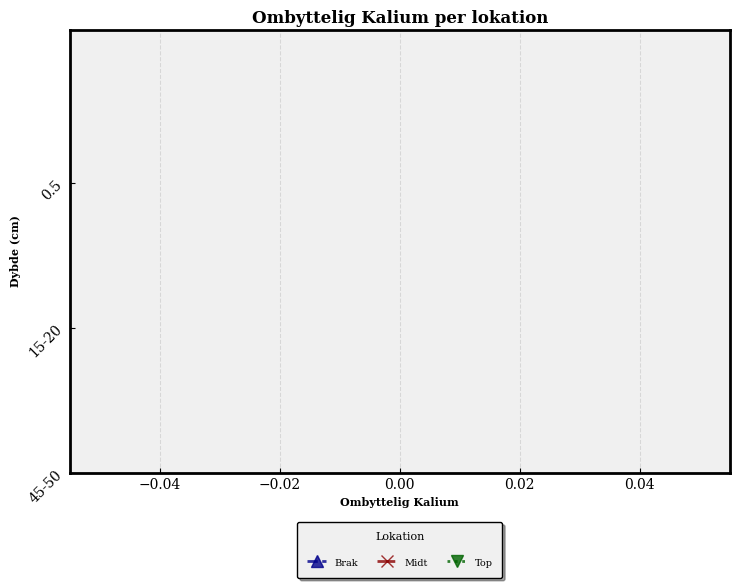

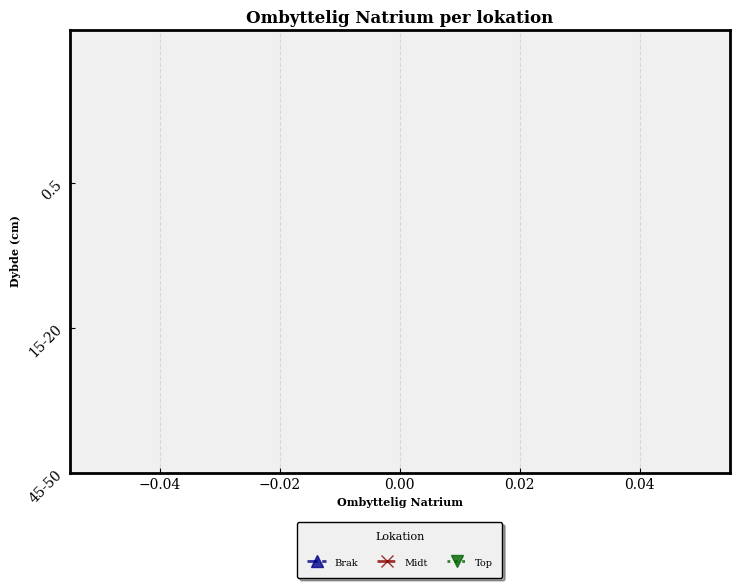

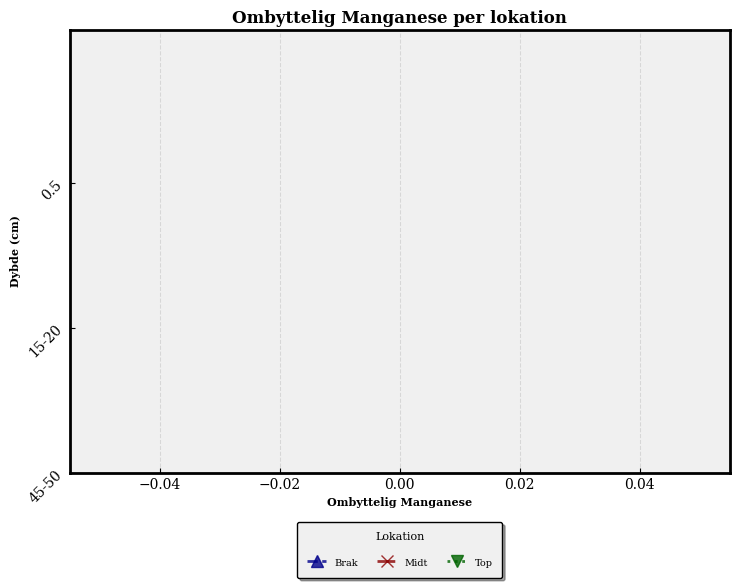

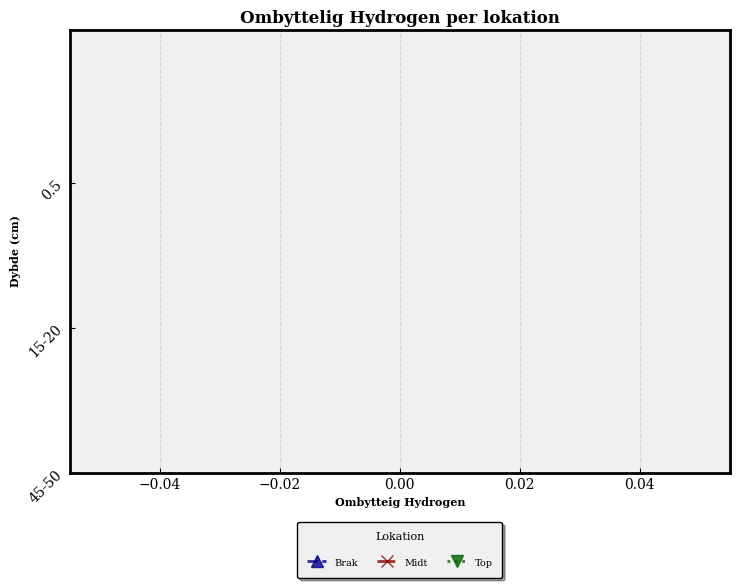

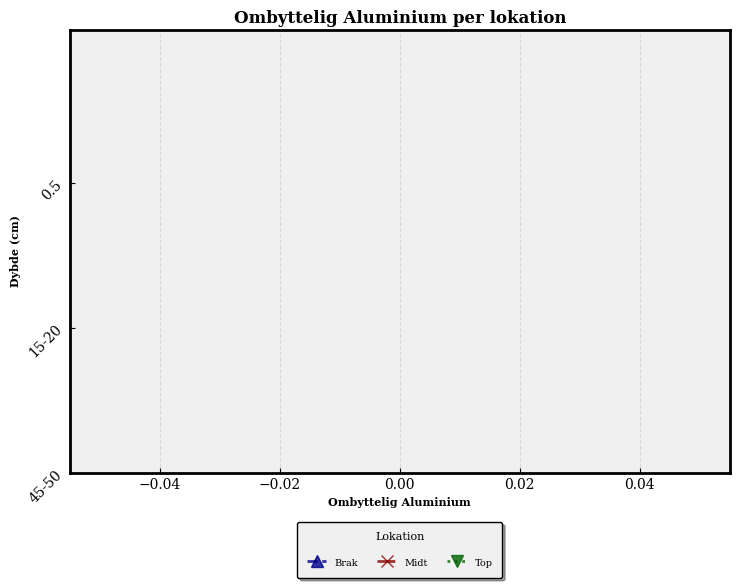

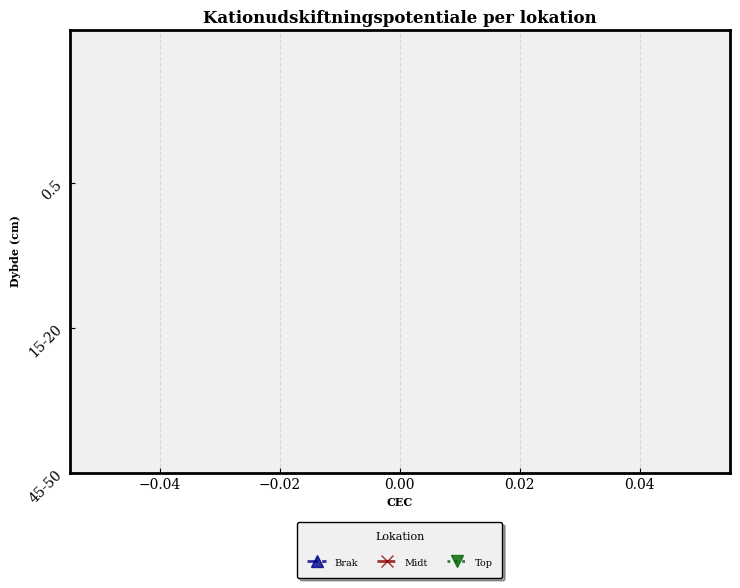

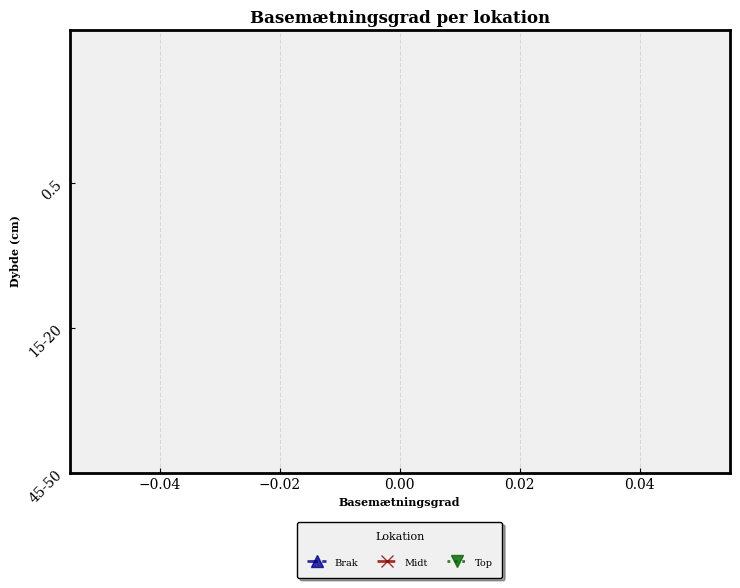

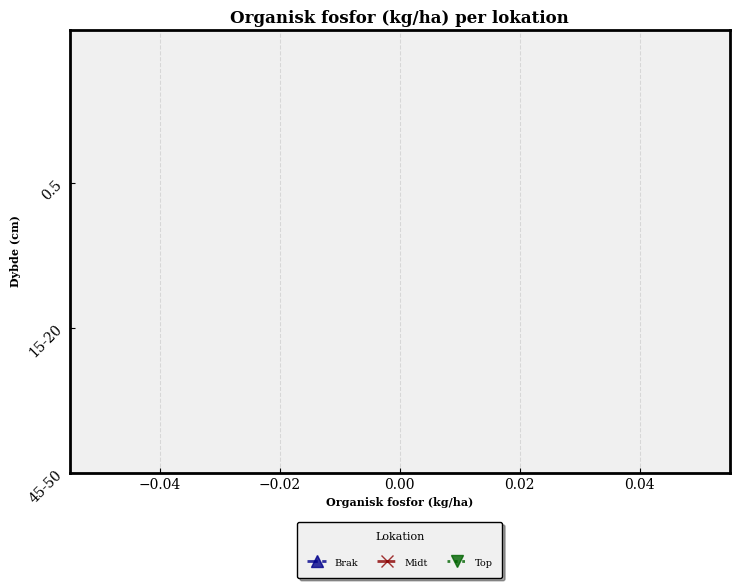

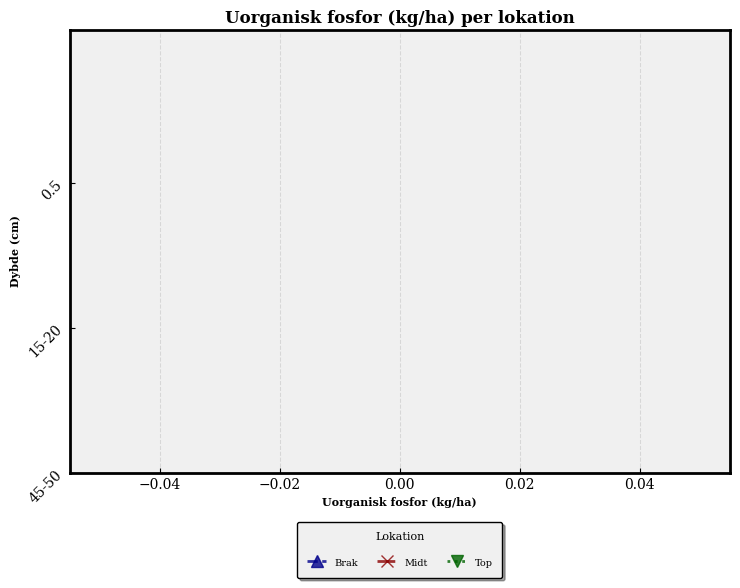

In [2]:
# Importering af biblioteker
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

#@authors == Johan Bo Kjær && Kasper Boisen Henriques


# Denne funktionalitet sørger for at importere en Google Sheets fil ind. Denne fil kan redigeres in real time og er tilgængelig for alle.
sheet_name = "Resultater_Lab"
sheet_id = "1h7mYkvkY5C6MjakeSv8ZGoMcU_yI_tIsN869vdWr75k" # unik Google Sheets ID
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

data = pd.read_csv(url, decimal=",")
df = pd.DataFrame(data)

# Denne giver lidt informationer omkring det data vi har. 
print(data.info())
print(data.describe())

# List of kolonner der skal konverteres til numeriske værdier
for col in df:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")


# Funktion til at udregne standard error 
def standard_error(x):
    return x.dropna().std() / np.sqrt(len(x.dropna()))


grouped_data = data.groupby(["Dybde", "Lokation"]).agg(
    Volumenvægt_mean = ("Volumenvægt (g/cm³)", "mean"),
    Volumenvægt_se = ("Volumenvægt (g/cm³)", standard_error), 
    Porøsitet_mean = ("Porøsitet (%)", "mean"),
    Porøsitet_se = ("Porøsitet (%)", standard_error),
    Vandindhold_mean = ("Volumetrisk Vandindhold (%)", "mean"),
    Vandindhold_se = ("Volumetrisk Vandindhold (%)", standard_error),
    gravimetrisk_mean = ("Gravimetrisk vandindhold (%)", "mean"),
    gravimetrisk_se = ("Gravimetrisk vandindhold (%)", standard_error),
    TOC_mean = ("Indhold af organisk kulstof (%)", "mean"),
    TOC_se = ("Indhold af organisk kulstof (%)", standard_error),
    pH_H2O_mean = ("pH H2O", "mean"),
    pH_H2O_se = ("pH H2O", standard_error),
    pH_cacl2_mean = ("pH CaCl2", "mean"),
    pH_cacl2_se = ("pH CaCl2", standard_error),
    Ledningsevne_mean = ("Ledningsevne (µS/cm)", "mean"),
    Ledningsevne_se = ("Ledningsevne (µS/cm)", standard_error),
    Reaktionstal_mean = ("Reaktionstal", "mean"),
    Reaktionstal_se = ("Reaktionstal", standard_error),
    CO2_produktion_mean = ("CO2 produktion", "mean"),
    CO2_produktion_se = ("CO2 produktion", standard_error),
    Opløst_kulstof_mean = ("Opløst organisk kulstof DOC (mg/L)", "mean"),
    Opløst_kulstof_se = ("Opløst organisk kulstof DOC (mg/L)", standard_error),
    Opløst_kvælstof_mean = ("Opløst organisk kvælstof DTN (mg/L)", "mean"),
    Opløst_kvælstof_se = ("Opløst organisk kvælstof DTN (mg/L)", standard_error),
    Opløst_org_kulstof_mean = ("Opløst organisk kulstof (kg/ha)", "mean"),
    Opløst_org_kulstof_se = ("Opløst organisk kulstof (kg/ha)", standard_error),
    Opløst_org_kvælstof_mean = ("Opløst organisk kvælstof (kg/ha)", "mean"),
    Opløst_org_kvælstof_se = ("Opløst organisk kvælstof (kg/ha)", standard_error),
    Organisk_kulstof_TOC_mean = ("Organisk kulstof TOC", "mean"),
    Organisk_kulstof_TOC_se = ("Organisk kulstof TOC", standard_error),
    Organisk_kvælstof_TON_mean = ("Organisk kvælstof TON", "mean"),
    Organisk_kvælstof_TON_se = ("Organisk kvælstof TON", standard_error),
    Organisk_kulstof_mean = ("Organisk kulstof (kg/ha)", "mean"),
    Organisk_kulstof_se = ("Organisk kulstof (kg/ha)", standard_error),
    Organisk_kvælstof_mean = ("Organisk kvælstof (kg/ha)", "mean"),
    Organisk_kvælstof_se = ("Organisk kvælstof (kg/ha)", standard_error),
    CN_forhold_mean = ("C/N forhold", "mean"),
    CN_forhold_se = ("C/N forhold", standard_error),
    Sand_mean = ("Sand", "mean"),
    Sand_se = ("Sand", standard_error),
    Silt_mean = ("Silt", "mean"),
    Silt_se = ("Silt", standard_error),
    Ler_mean = ("Ler", "mean"),
    Ler_se = ("Ler", standard_error),
    Jordtype_mean = ("Jordtype", "mean"),
    Jordtype_se = ("Jordtype", standard_error),
    Ombyttelig_Ca_mean = ("Ombyttelig Ca", "mean"),
    Ombyttelig_Ca_se = ("Ombyttelig Ca", standard_error),
    Ombyttelig_Mg_mean = ("Ombyttelig Mg", "mean"),
    Ombyttelig_Mg_se = ("Ombyttelig Mg", standard_error),
    Ombyttelig_K_mean = ("Ombyttelig K", "mean"),
    Ombyttelig_K_se = ("Ombyttelig K", standard_error),
    Ombyttelig_Na_mean = ("Ombyttelig Na", "mean"),
    Ombyttelig_Na_se = ("Ombyttelig Na", standard_error),
    Ombyttelig_Mn_mean = ("Ombyttelig Mn", "mean"),
    Ombyttelig_Mn_se = ("Ombyttelig Mn", standard_error),
    Ombyttelig_H_mean = ("Ombyttelig H", "mean"),
    Ombyttelig_H_se = ("Ombyttelig H", standard_error),
    Ombyttelig_Al_mean = ("Ombyttelig Al", "mean"),
    Ombyttelig_Al_se = ("Ombyttelig Al", standard_error),
    CEC_mean = ("CEC", "mean"),
    CEC_se = ("CEC", standard_error),
    Basemætningsgrad_mean = ("Basemætningsgrad", "mean"),
    Basemætningsgrad_se = ("Basemætningsgrad", standard_error),
    Organisk_fosfor_mean = ("Organisk fosfor (kg/ha)", "mean"),
    Organisk_fosfor_se = ("Organisk fosfor (kg/ha)", standard_error),
    Uorganisk_fosfor_mean = ("Uorganisk fosfor (kg/ha)", "mean"),
    Uorganisk_fosfor_se = ("Uorganisk fosfor (kg/ha)", standard_error)
).reset_index() # resetter index-værdierne i kolonnerne til [0, 1, 2 osv] fremfor dybde. 

grouped_data.to_json('groupeddata_output.json', orient="columns")


# Funktion til at oprette plots
def plot_metric_with_depth(data, metric_mean, metric_se, title, xlabel):
    plt.rcParams['font.family'] = 'DeJavu Serif'
    plt.rcParams['font.serif'] = 'Times New Roman'
    
    plt.figure(figsize=(10, 6), facecolor="#FFFFFF") # størrelsen og farven af figuren

    # liste of forskellige markører og farver. Der kan tilføjes flere farver hvis det er nødvendigt.
    markers = ["^", "x", "v"]
    colors = ["darkblue", "darkred", "darkgreen"]
    linestyles = ["dashed", "dashdot", "dotted"]
    
    y_ticks = ["0.5", "15-20", "45-50"]
    y_positions = np.array([1, 2, 3])
   
    # Koordinater for y-akserne for hver linje
    shift_map = {
        "Brak": 0.07,
        "Midt": 0.0,
        "Top": -0.07
    }

    for i, location in enumerate(data["Lokation"].unique()):
        subset = data[data["Lokation"] == location] # For-loopet itererer over "lokationer" i kolonnen "lokationer" og finder alle værdier i andre kolonner hvor hver lokation og deler dem op i subsets eg. [Brak: Value], [Midt: Value], [Top: Value]. 
        # Enumerate giver index og værdi for hvert element i kolonnerne.
        
        # Dette rykker y-akse værdierne 
        y_shift = shift_map.get(location, 0)
        y_positions_shifted = y_positions + y_shift
        
        # Dette er plottet for linjerne og datapunkter
        plt.plot(
            subset[metric_mean],
            y_positions_shifted,
            marker=markers[i % len(markers)], # unik markør baseret på index
            color=colors[i % len(colors)], # unik farve baseret på index
            markersize=8, # formattering
            label=location, # formattering
            linestyle=linestyles[i % len(linestyles)], # formattering
            linewidth=2, # formattering
            alpha=0.8
        )

        # dette er errorbars 
        plt.errorbar(
            subset[metric_mean],
            y_positions_shifted,
            xerr=subset[metric_se], # standard-error for errorbars.
            fmt="none", # ved ikke helt hvad denne kan bruges til. Hvis man skriver noget andet, så ser det mærkeligt ud
            elinewidth=1.5,
            ecolor=colors[i % len(colors)], # formattering
            alpha=0.5, # formattering
            capsize=5 # formattering
        )
    
    plt.title(title, fontsize=12, pad=5, fontweight="bold") # formattering
    plt.yticks(ticks=y_positions, labels=y_ticks, rotation=45)
    plt.xlabel(xlabel, fontsize=8, fontweight="bold") # formattering
    plt.ylabel("Dybde (cm)", fontsize=8, fontweight="bold") # formattering
    plt.gca().invert_yaxis() # Ændring af yaksens retning
    plt.gca().set_facecolor("#F0F0F0")#farven af akse-displayet
    plt.gca().tick_params(direction="in", which="both")
    plt.grid(axis="x", linestyle="--", alpha=0.1, color="#000000")

    legend = plt.legend(
        title="Lokation",
        bbox_to_anchor=(0.5, -0.1),
        loc="upper center",
        fontsize=7,
        title_fontsize=8,
        frameon=True,
        facecolor="#F0F0F0",
        edgecolor="black",
        shadow=True,
        fancybox=True,
        borderpad=1,
        labelspacing=1.5,
        handlelength=2,
        handleheight=1.5,
        ncol=3 # antal kolonner til legend
    )

    for spine in plt.gca().spines.values(): # formattering af kanten på akserne
        spine.set_visible(True)
        spine.set_linewidth(2)
        spine.set_edgecolor("black")

    plt.tight_layout(rect=[0, 0, 0.75, 1]) # formattering
    plt.show() 


# Tilføje de nye metrics når de bliver tilgængelig. (metric, titel, xlabel)
metrics_to_plot = [("Volumenvægt", "Volumenvægt (g/cm³) per lokation", "Volumenvægt (g/cm³)"),
    ("Porøsitet", "Porøsitet (%) per Lokation", "Porøsitet (%)"),
    ("Vandindhold", "Volumetrisk Vandindhold (%) per Lokation", "Volumetrisk Vandindhold (%)"),
    ("gravimetrisk", "Gravimetrisk vandindhold (%) per Lokation", "Gravimetrisk vandindhold (%)"),
    ("TOC", "Indhold af organisk kulstof (%) per Lokation", "Indhold af organisk kulstof (%)"),
    ("pH_H2O", "pH H2O per Lokation", "pH H2O"),
    ("pH_cacl2", "pH CaCl2 per Lokation", "pH CaCl2"),
    ("Ledningsevne", "Ledningsevne (µS/cm) per Lokation", "Ledningsevne (µS/cm)"),
    ("Reaktionstal", "Reaktionstal per Lokation", "Reaktionstal"),
    ("CO2_produktion", "CO2 produktion (ppm) per Lokation", "CO2 produktion (ppm)"),
    ("Opløst_kulstof", "Opløst oganisk kulstof (mg/L) per Lokation", "Opløst organisk kulstof (mg/L)"),
    ("Opløst_kvælstof", "Opløst organisk kvælstof (mg/L) per Lokation", "Opløst organisk kvælstof (mg/L)"),
    ("Opløst_org_kulstof", "Opløst organisk kulstof (kg/ha) per lokation", "Opløst organisk kulstof (kg/ha)"),
    ("Opløst_org_kvælstof", "Opløst organisk kvælstof (kg/ha) per lokation", "Opløst organisk kvælstof (kg/ha)"),
    ("Organisk_kulstof_TOC", "Organisk kulstof TOC per lokation", "Organisk kulstof TOC"),
    ("Organisk_kvælstof_TON", "Organisk kvælstof TON per lokation", "Organisk kvælstof TON"),
    ("Organisk_kulstof", "Organisk kulstof (kg/ha) per lokation", "Organisk kulstof (kg/ha)"),
    ("Organisk_kvælstof", "Organisk kvælstof (kg/ha) per lokation", "Organisk kvælstof (kg/ha)"),
    ("CN_forhold", "C/N forhold per lokation", "C/N forhold"),
    ("Sand", "Sand per lokation", "Sand"),
    ("Silt", "Silt per lokation", "Silt"),
    ("Ler", "Ler per lokation", "Ler"),
    ("Jordtype", "Jordtype per lokation", "Jordtype"),
    ("Ombyttelig_Ca", "Ombyttelig Calcium per lokation", "Ombyttelig Calcium"),
    ("Ombyttelig_Mg", "Ombyttelig Magnesium per lokation", "Ombyttelig Magnesium"),
    ("Ombyttelig_K", "Ombyttelig Kalium per lokation", "Ombyttelig Kalium"),
    ("Ombyttelig_Na", "Ombyttelig Natrium per lokation", "Ombyttelig Natrium"),
    ("Ombyttelig_Mn", "Ombyttelig Manganese per lokation", "Ombyttelig Manganese"),
    ("Ombyttelig_H", "Ombyttelig Hydrogen per lokation", "Ombytteig Hydrogen"),
    ("Ombyttelig_Al", "Ombyttelig Aluminium per lokation", "Ombyttelig Aluminium"),
    ("CEC", "Kationudskiftningspotentiale per lokation", "CEC"),
    ("Basemætningsgrad", "Basemætningsgrad per lokation", "Basemætningsgrad"),
    ("Organisk_fosfor", "Organisk fosfor (kg/ha) per lokation", "Organisk fosfor (kg/ha)"),
    ("Uorganisk_fosfor", "Uorganisk fosfor (kg/ha) per lokation", "Uorganisk fosfor (kg/ha)"),
]


# loop til at plotte hver enkelt undersøgelse
for metric, title, xlabel in metrics_to_plot:
    plot_metric_with_depth(grouped_data, f"{metric}_mean", f"{metric}_se", title, xlabel)


Regressionsmatrix og regressionsplot

In [ ]:
# Hej Kasper
# Her er code cellen til dit script

# Importering af biblioteker
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import seaborn as sns
import statsmodels.api as sm

# Import af data fra Excel filen. For Johan: ændre brugeren til og fra joha4 til Johan og omvendt (PC og Laptop). 
#data = pd.read_excel(r'C:\Users\Johan\OneDrive\Skrivebord_LapTop\Resultater_Lab.xlsx', decimal=",")

# Dette er stien på google sheets dokumentet
sheet_name = "Resultater_Lab"
sheet_id = "1h7mYkvkY5C6MjakeSv8ZGoMcU_yI_tIsN869vdWr75k" # unik Google Sheets ID
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

data = pd.read_csv(url, decimal=",")



#Korrelationsmatrix:
# Udvælg kun numeriske kolonner for korrelationsberegning
numerical_data = data.select_dtypes(include=[np.number])

# Udregn korrelationsmatrixen
correlation_matrix = numerical_data.corr()

# Visualisering af korrelation som et heatmap
plt.figure(figsize=(12, 10))
plt.title("Korrelationsmatrix mellem parametre", fontsize=16)
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="none", aspect="auto")
plt.colorbar(label="Korrelationskoefficient")
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90, fontsize=10)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, fontsize=10)
plt.tight_layout()
plt.show()

# Plot af udvalgt korrelation: 
# Funktion til scatterplots med regressionslinje og ligning/r^2
def scatter_with_regression(data, x_col, y_col, title=None):
    plt.figure(figsize=(10, 6))
    
    # Fjern manglende værdier for både x og y
    clean_data = data[[x_col, y_col]].dropna()
    x = clean_data[x_col]
    y = clean_data[y_col]
    x = sm.add_constant(x)  # Tilføj konstant for intercept
    
    # Udfør lineær regression
    model = sm.OLS(y, x).fit()
    slope = model.params.iloc[1]
    intercept = model.params.iloc[0]
    r_squared = model.rsquared
    

    
    # Tegn scatterplot og regression
    sns.regplot(
        x=x_col,
        y=y_col,
        data=clean_data,
        scatter_kws={"alpha": 0.6},
        line_kws={"color": "red", "lw": 2}
    )
    
    # Vis ligning og r^2 på plottet
    equation = f"$y = {slope:.2f}x + {intercept:.2f}$\n$R^2 = {r_squared:.2f}$"
    plt.text(0.05, 0.95, equation, fontsize=12, transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
    
    # Titel og akseformattering
    plt.title(title if title else f"{x_col} vs {y_col}", fontsize=20, pad=20, fontweight="bold")
    plt.xlabel(x_col, fontsize=12, fontweight="bold")
    plt.ylabel(y_col, fontsize=12, fontweight="bold")
    plt.gca().set_facecolor("#F0F0F0")
    plt.gca().tick_params(direction="in", which="both")

    plt.grid(axis="both", linestyle="--", alpha=0.1, color="000000")
    for spine in plt.gca().spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.9)
        spine.set_edgecolor("black")
    plt.show()

# Laver liste over relevante udvalgte korrelationspar 
relevant_pairs = [
    ("Porøsitet (%)", "Volumenvægt (g/cm³)"),  # Stærk negativ korrelation
    ("Indhold af organisk kulstof (%)", "Porøsitet (%)"),  # Positiv korrelation
    ("Reaktionstal", "pH CaCl2"),  # Stærk positiv korrelation
    ("pH H2O", "Gravimetrisk vandindhold (%)")  # Negativ korrelation
]

# Generer scatterplots for de valgte par
for x_col, y_col in relevant_pairs:
    scatter_with_regression(
        data=data,
        x_col=x_col,
        y_col=y_col,
        title=f"{x_col} vs {y_col}"
    )



Regressionsplot af CO2 produktion


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress


# Data

data_co2 = pd.DataFrame({
    "Tid (sek)": [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300],
    "0-5cm": [72.77, 75.94, 79.53, 82.83, 86.14, 89.17, 92.21, 95.24, 97.86, 101.03, 103.92]
})

# Funktion

def plot_linear_regression(data, x_columns, y_columns, title, xlabel, ylabel):
    plt.rcParams['font.family'] = 'DeJavu Serif'
    plt.rcParams["font.serif"] = "Times New Roman"
    plt.figure(figsize=(10, 6), facecolor="#FFFFFF")

    for column in y_columns:
        x = data[x_columns]
        y = data[column]

        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        line = slope * x + intercept
        r_squared = r_value**2

        plt.scatter(x, y)
        plt.plot(x, line, color="black", label=f"y = {slope:.2f}x + {intercept:.2f}\n" f"R² = {r_squared:.3f}")


    plt.title(title, fontsize=20, pad=20, fontweight="bold") # formattering
    
    plt.xlabel(xlabel, fontsize=12, fontweight="bold")
    plt.xticks(np.arange(0, 301, 30)) # formattering
    plt.ylabel(ylabel, fontsize=12, fontweight="bold")
    plt.gca().set_facecolor("#F0F0F0") # farven af akse-displayet
    plt.gca().tick_params(direction="in", which="both")
    plt.subplots_adjust(right=0.75)
    legend = plt.legend(bbox_to_anchor=(0.4, 0.9), facecolor="#FFFFFF", edgecolor="black", fontsize=10)
    legend.get_title().set_fontsize("12")
    legend.get_title().set_fontweight("bold")
    plt.grid(axis="both", linestyle="--", alpha=0.1, color="#000000")

    for spine in plt.gca().spines.values(): # formattering af kanten på akserne
        spine.set_visible(True)
        spine.set_linewidth(0.5)
        spine.set_edgecolor("black")

    plt.tight_layout(rect=[0, 0, 0.75, 1]) # formattering
    plt.show() 
                 
plot_linear_regression(data_co2, "Tid (sek)", ["0-5cm"], "CO2 Produktion for dybden 0-5cm", "Tid (sek)", "CO2 (ppm)")

test